In [336]:
# Importing Libraries
import warnings
warnings.filterwarnings('ignore')

In [337]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importing Data

In [338]:
pd.set_option('display.max_columns', 150)
loandata = pd.read_csv("loan.csv", low_memory=False)
loandata.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [339]:
pd.set_option('display.max_rows', 100)
print(loandata.shape)
#Finding percentage of null or missing values
null_perc = round(100*(loandata.isnull().sum()/len(loandata.index)), 2)
#Printing columns which have more than 0% missing values
null_perc[ null_perc > 0 ]

(39717, 111)


emp_title                           6.19
emp_length                          2.71
desc                               32.58
title                               0.03
mths_since_last_delinq             64.66
mths_since_last_record             92.99
revol_util                          0.13
last_pymnt_d                        0.18
next_pymnt_d                       97.13
last_credit_pull_d                  0.01
collections_12_mths_ex_med          0.14
mths_since_last_major_derog       100.00
annual_inc_joint                  100.00
dti_joint                         100.00
verification_status_joint         100.00
tot_coll_amt                      100.00
tot_cur_bal                       100.00
open_acc_6m                       100.00
open_il_6m                        100.00
open_il_12m                       100.00
open_il_24m                       100.00
mths_since_rcnt_il                100.00
total_bal_il                      100.00
il_util                           100.00
open_rv_12m     

In [340]:
#Removing columns which has more than 100% null values in it.
loandata.drop(null_perc[ null_perc == 100 ].index, axis=1, inplace=True)
loandata

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,0.0,0.0,13,0,7274,13.10%,40,f,0.00,0.00,2822.969293,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,NaN,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,5.0,0.0,6,0,8847,26.90%,9,f,0.00,0.00,9913.491822,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,NaN,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A

In [341]:
loandata.shape

(39717, 57)

In [342]:
loandata.nunique().sort_values()
#finding no of unique values in the column

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
pymnt_plan                        1
initial_list_status               1
term                              2
next_pymnt_d                      2
pub_rec_bankruptcies              3
loan_status                       3
verification_status               3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
mths_since_last_delinq           95
last_pymnt_d                

In [343]:
#tax_liens,delinq_amnt,chargeoff_within_12_mths,acc_now_delinq,application_type,policy_code,collections_12_mths_ex_med,
#pymnt_plan,initial_list_status these columns have only one unique values so removing them
loandata.drop(['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 'policy_code',
               'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan'], axis=1, inplace=True)
loandata.shape

(39717, 48)

In [344]:
#remvoing emp_title because i think it is free text entered by the client so I wont be able analyes any useful data
loandata.drop("emp_title", axis=1, inplace=True)

In [345]:
#remvoing title because i think it is free text entered by the client so I wont be able analyes any useful data
loandata.drop("title", axis=1, inplace=True)

In [346]:
#Finding top 10 number of unique values
loandata.nunique().sort_values(ascending=False).head(10)
#will use id has 

id                 39717
url                39717
member_id          39717
total_pymnt        37850
total_pymnt_inv    37518
total_rec_int      35148
last_pymnt_amnt    34930
desc               26527
revol_bal          21711
installment        15383
dtype: int64

In [347]:
#Droping URL column because only usefull info i can extract is loan ID which i already have in ID column
loandata.drop('url', axis=1, inplace=True)

In [348]:
#total_rec_int,total_rec_late_fee are intrest and late fee values so has nothing to do with loan sanction so removing them
loandata.drop(['total_rec_int','total_rec_late_fee'], axis=1, inplace=True)


In [349]:
#removing member_id as there is already a id coulmn which can be used
loandata.drop('member_id', axis=1, inplace=True)

In [350]:
#removing recoveries coulmn as it is for post recovery and doesnt have any thing to do with loan
loandata.drop('recoveries', axis=1, inplace=True)

In [351]:
#removing out_prncp,out_prncp_inv as it is remaining amount to br paid it has nothing to do with this case study
loandata.drop(['out_prncp','out_prncp_inv'], axis=1, inplace=True)

In [352]:
#removing zip_code as it is masked and nothing can be extracted for this case study
loandata.drop('zip_code', axis=1, inplace=True)

In [353]:
#removing addr_state has state has nothing importance for this case study
loandata.drop('addr_state', axis=1, inplace=True)

In [354]:
#mths_since_last_delinq,mths_since_last_record,collection_recovery_fee are post approval so not needed
loandata.drop(['mths_since_last_delinq','mths_since_last_delinq','collection_recovery_fee'], axis=1, inplace=True)

In [355]:
print(loandata.shape)
loandata.head()

(39717, 35)


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,Borrower added on 12/22/11 > I need to upgra...,credit_card,27.65,0,Jan-85,1,NaN,3,0,13648,83.70%,9,5863.155187,5833.84,5000.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,Borrower added on 12/22/11 > I plan to use t...,car,1.00,0,Apr-99,5,NaN,3,0,1687,9.40%,4,1008.710000,1008.71,456.46,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,NaN,small_business,8.72,0,Nov-01,2,NaN,2,0,2956,98.50%,10,3005.666844,3005.67,2400.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,Borrower added on 12/21/11 > to pay for prop...,other,20.00,0,Feb-96,1,NaN,10,0,5598,21%,37,12231.890000,12231.89,10000.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,Borrower added on 12/21/11 > I plan on combi...,other,17.94,0,Jan-96,0,NaN,15,0,27783,53.90%,38,3513.330000,3513.33,2475.94,May-16,67.79,Jun-16,May-16,0.0


In [356]:
#removing current has we cannot use then for this case study as we are dealing with how will not pay the loan
loandata = loandata[loandata.loan_status != "Current"]

In [358]:
#Checking columns after dropping rows for current
nullpercentage = round(100*(loandata.isnull().sum()/len(loandata.index)), 2)
nullpercentage[ nullpercentage > 0 ]

emp_length                  2.68
desc                       32.47
mths_since_last_record     92.90
revol_util                  0.13
last_pymnt_d                0.18
next_pymnt_d              100.00
last_credit_pull_d          0.01
pub_rec_bankruptcies        1.81
dtype: float64

In [359]:
#droping the columns next_pymnt_d and mths_since_last_record has it has mostly null/empty values
loandata.drop(['mths_since_last_record','next_pymnt_d'], axis=1, inplace=True)
loandata.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,Borrower added on 12/22/11 > I need to upgra...,credit_card,27.65,0,Jan-85,1,3,0,13648,83.70%,9,5863.155187,5833.84,5000.00,Jan-15,171.62,May-16,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,Borrower added on 12/22/11 > I plan to use t...,car,1.00,0,Apr-99,5,3,0,1687,9.40%,4,1008.710000,1008.71,456.46,Apr-13,119.66,Sep-13,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,NaN,small_business,8.72,0,Nov-01,2,2,0,2956,98.50%,10,3005.666844,3005.67,2400.00,Jun-14,649.91,May-16,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,Borrower added on 12/21/11 > to pay for prop...,other,20.00,0,Feb-96,1,10,0,5598,21%,37,12231.890000,12231.89,10000.00,Jan-15,357.48,Apr-16,0.0
5,1075269,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,NaN,wedding,11.20,0,Nov-04,3,9,0,7963,28.30%,12,5632.210000,5632.21,5000.00,Jan-15,161.03,Jan-16,0.0


In [360]:
nullpercentage = round(100*(loandata.isnull().sum()/len(loandata.index)), 2)
nullpercentage[ nullpercentage > 0 ]

emp_length               2.68
desc                    32.47
revol_util               0.13
last_pymnt_d             0.18
last_credit_pull_d       0.01
pub_rec_bankruptcies     1.81
dtype: float64

In [361]:
#Removing desc column because 30% data is missing and it is free text field
loandata.drop(['desc'], axis=1, inplace=True)
loandata.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,0,Jan-85,1,3,0,13648,83.70%,9,5863.155187,5833.84,5000.00,Jan-15,171.62,May-16,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,0,Apr-99,5,3,0,1687,9.40%,4,1008.710000,1008.71,456.46,Apr-13,119.66,Sep-13,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,0,Nov-01,2,2,0,2956,98.50%,10,3005.666844,3005.67,2400.00,Jun-14,649.91,May-16,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,0,Feb-96,1,10,0,5598,21%,37,12231.890000,12231.89,10000.00,Jan-15,357.48,Apr-16,0.0
5,1075269,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,11.20,0,Nov-04,3,9,0,7963,28.30%,12,5632.210000,5632.21,5000.00,Jan-15,161.03,Jan-16,0.0


In [362]:
nullpercentage = round(100*(loandata.isnull().sum()/len(loandata.index)), 2)
nullpercentage[ nullpercentage > 0 ]

emp_length              2.68
revol_util              0.13
last_pymnt_d            0.18
last_credit_pull_d      0.01
pub_rec_bankruptcies    1.81
dtype: float64

In [363]:
loandata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38577 non-null  int64  
 1   loan_amnt             38577 non-null  int64  
 2   funded_amnt           38577 non-null  int64  
 3   funded_amnt_inv       38577 non-null  float64
 4   term                  38577 non-null  object 
 5   int_rate              38577 non-null  object 
 6   installment           38577 non-null  float64
 7   grade                 38577 non-null  object 
 8   sub_grade             38577 non-null  object 
 9   emp_length            37544 non-null  object 
 10  home_ownership        38577 non-null  object 
 11  annual_inc            38577 non-null  float64
 12  verification_status   38577 non-null  object 
 13  issue_d               38577 non-null  object 
 14  loan_status           38577 non-null  object 
 15  purpose            

In [364]:
print("Mode : " + loandata['emp_length'].mode()[0])
loandata['emp_length'].value_counts()

Mode : 10+ years


10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [289]:
#emp_length mode is 10+ years and null is very less so we can assume and replace the value

In [366]:
loandata['emp_length'].fillna(loandata['emp_length'].mode()[0], inplace = True)

In [367]:
nullpercentage = round(100*(loandata.isnull().sum()/len(loandata.index)), 2)
nullpercentage[ nullpercentage > 0 ]

revol_util              0.13
last_pymnt_d            0.18
last_credit_pull_d      0.01
pub_rec_bankruptcies    1.81
dtype: float64

In [368]:
loandata.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
loandata.revol_util.isna().sum()

0

In [369]:
nullpercentage = round(100*(loandata.isnull().sum()/len(loandata.index)), 2)
nullpercentage[ nullpercentage > 0 ]

last_pymnt_d            0.17
last_credit_pull_d      0.01
pub_rec_bankruptcies    1.81
dtype: float64

In [370]:
#can drop 'last_pymnt_d','last_credit_pull_d','pub_rec_bankruptcies' has these columns have no importance in our case study 
loandata.drop(['last_pymnt_d','last_credit_pull_d','pub_rec_bankruptcies'], axis=1, inplace=True)
loandata.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,last_pymnt_amnt
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,0,Jan-85,1,3,0,13648,83.70%,9,5863.155187,5833.84,5000.00,171.62
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,0,Apr-99,5,3,0,1687,9.40%,4,1008.710000,1008.71,456.46,119.66
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,0,Nov-01,2,2,0,2956,98.50%,10,3005.666844,3005.67,2400.00,649.91
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,0,Feb-96,1,10,0,5598,21%,37,12231.890000,12231.89,10000.00,357.48
5,1075269,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,11.20,0,Nov-04,3,9,0,7963,28.30%,12,5632.210000,5632.21,5000.00,161.03


In [371]:
nullpercentage = round(100*(loandata.isnull().sum()/len(loandata.index)), 2)
nullpercentage[ nullpercentage > 0 ]

Series([], dtype: float64)

In [372]:
loandata.dtypes

id                       int64
loan_amnt                int64
funded_amnt              int64
funded_amnt_inv        float64
term                    object
int_rate                object
installment            float64
grade                   object
sub_grade               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
purpose                 object
dti                    float64
delinq_2yrs              int64
earliest_cr_line        object
inq_last_6mths           int64
open_acc                 int64
pub_rec                  int64
revol_bal                int64
revol_util              object
total_acc                int64
total_pymnt            float64
total_pymnt_inv        float64
total_rec_prncp        float64
last_pymnt_amnt        float64
dtype: object

In [373]:
#Removing % symbol revol_util and int_rate
loandata['int_rate'] = loandata.int_rate.str.strip('%').astype(float)
loandata['revol_util'] = loandata.revol_util.str.strip('%').astype(float)

In [374]:
#(< 1 year) is assumed as 0 and 10+ years is assumed as 10
loandata['emp_length'] = pd.to_numeric(loandata['emp_length'].apply(
    lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

In [375]:
loandata.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,last_pymnt_amnt
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,0,Jan-85,1,3,0,13648,83.7,9,5863.155187,5833.84,5000.00,171.62
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,0,Apr-99,5,3,0,1687,9.4,4,1008.710000,1008.71,456.46,119.66
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,0,Nov-01,2,2,0,2956,98.5,10,3005.666844,3005.67,2400.00,649.91
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,0,Feb-96,1,10,0,5598,21.0,37,12231.890000,12231.89,10000.00,357.48
5,1075269,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,11.20,0,Nov-04,3,9,0,7963,28.3,12,5632.210000,5632.21,5000.00,161.03


In [ ]:
#Finding Outliers in numerical values

<AxesSubplot:xlabel='annual_inc'>

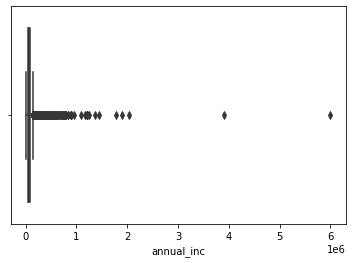

In [376]:
sns.boxplot(loandata['annual_inc'])

In [377]:
#from above boxplot Outliers are present
loandata['annual_inc'].describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    3.852700e+04
mean     6.880923e+04
std      6.421493e+04
min      4.000000e+03
5%       2.400000e+04
10%      3.000000e+04
25%      4.000000e+04
50%      5.900000e+04
75%      8.200000e+04
90%      1.150000e+05
95%      1.400040e+05
99%      2.340000e+05
max      6.000000e+06
Name: annual_inc, dtype: float64

In [378]:
loandata['annual_inc'].describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9, 0.95, 0.97,0.98, 0.99])

count    3.852700e+04
mean     6.880923e+04
std      6.421493e+04
min      4.000000e+03
5%       2.400000e+04
10%      3.000000e+04
25%      4.000000e+04
50%      5.900000e+04
75%      8.200000e+04
90%      1.150000e+05
95%      1.400040e+05
97%      1.650000e+05
98%      1.870000e+05
99%      2.340000e+05
max      6.000000e+06
Name: annual_inc, dtype: float64

In [379]:
#The values after 95 percentile seems to be disconected from the general distribution and also there is huge increase in the 
#value for small quantile variation so removing them
per_95_annual_inc = loandata['annual_inc'].quantile(0.95)
loandata = loandata[loandata['annual_inc'] <= per_95_annual_inc]

<AxesSubplot:xlabel='annual_inc'>

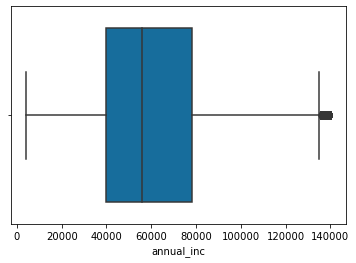

In [380]:
sns.boxplot(loandata['annual_inc'])

<AxesSubplot:xlabel='dti'>

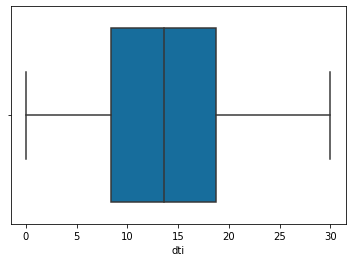

In [381]:
sns.boxplot(loandata['dti']) #No outliers

<AxesSubplot:xlabel='loan_amnt'>

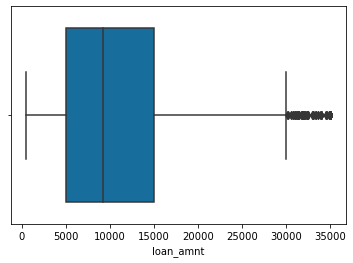

In [382]:
sns.boxplot(loandata['loan_amnt']) #Outliers present 

In [383]:
loandata['loan_amnt'].describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    36606.000000
mean     10690.058324
std       7048.412687
min        500.000000
5%        2300.000000
10%       3000.000000
25%       5000.000000
50%       9250.000000
75%      15000.000000
90%      20000.000000
95%      25000.000000
99%      35000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [384]:
loandata['loan_amnt'].describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.96,0.97,0.975, 0.98, 0.99, 1.0])

count    36606.000000
mean     10690.058324
std       7048.412687
min        500.000000
5%        2300.000000
10%       3000.000000
25%       5000.000000
50%       9250.000000
75%      15000.000000
90%      20000.000000
95%      25000.000000
96%      25000.000000
97%      25475.000000
97.5%    28000.000000
98%      30000.000000
99%      35000.000000
100%     35000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [323]:
#for loan_amnt outliers are present but there is no significant difference so not removng it

<AxesSubplot:xlabel='funded_amnt_inv'>

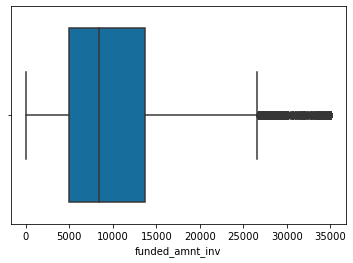

In [385]:
sns.boxplot(loandata['funded_amnt_inv'])

In [386]:
loandata['funded_amnt_inv'].quantile([0.5,0.75,0.90,0.95,0.96,0.97,0.975,0.98,0.985, 0.99, 1.0])

0.500     8396.342174
0.750    13649.999283
0.900    19750.000000
0.950    23949.287805
0.960    24664.436978
0.970    24975.000000
0.975    25350.000000
0.980    27953.287538
0.985    29925.000000
0.990    31966.803281
1.000    35000.000000
Name: funded_amnt_inv, dtype: float64

In [442]:
#Creating new columns and checking which month/year gives more defaulter 

#converting to date type
loandata['issue_d'] = pd.to_datetime(loandata.issue_d, format='%b-%y')
#if there are any data before unix timestamp they are converted to 21 century values, 
#so subtracting values more than 2020  with 100 will give more actual time
loandata['issue_d'] = loandata['issue_d'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)

loandata['issue_d_year'] = loandata.issue_d.dt.year
loandata['issue_d_month'] = loandata.issue_d.dt.strftime('%b')

<AxesSubplot:title={'center':'Year wise Defaulter'}, xlabel='issue_d_year', ylabel='count'>

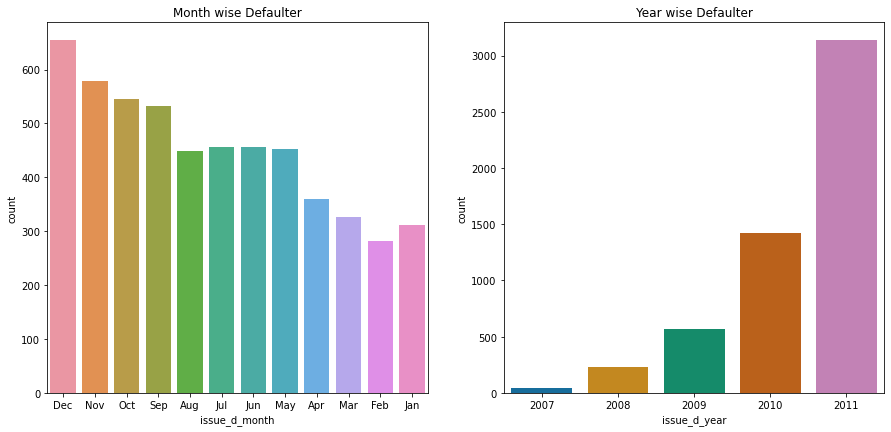

In [495]:
plt.figure(figsize=(15,15))
plt.subplot(221)
plt.title('Month wise Defaulter')
sns.countplot(x='issue_d_month', data=loandata[loandata['loan_status']=='Charged Off'])

plt.subplot(222)
plt.title('Year wise Defaulter')
sns.countplot(x='issue_d_year', data=loandata[loandata['loan_status']=='Charged Off'])

In [328]:
#for funded_amnt_inv outliers are present but there is no significant difference so not removng it

<AxesSubplot:title={'center':'Loan Status'}, xlabel='loan_status', ylabel='count'>

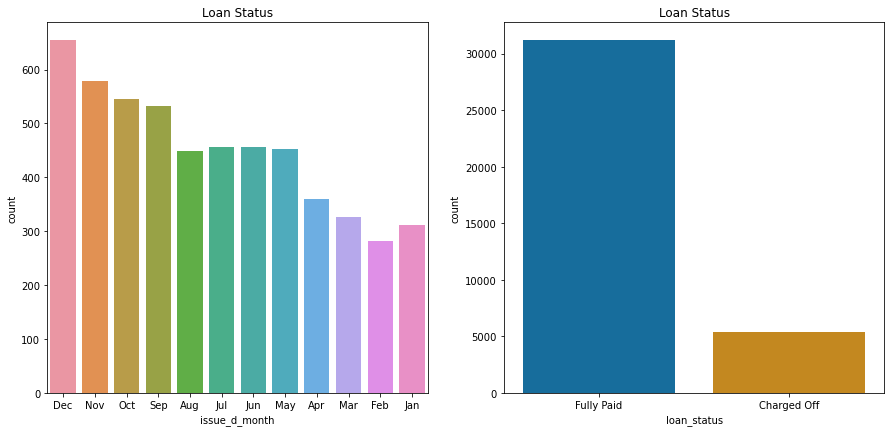

In [496]:
plt.figure(figsize=(15,15))
plt.subplot(221)
plt.title('Loan Status')
sns.countplot(x='issue_d_month', data=loandata[loandata['loan_status']=='Charged Off'])

plt.subplot(222)
plt.title('Year wise Defaulter')
sns.countplot(x='issue_d_year', data=loandata[loandata['loan_status']=='Charged Off'])

plt.title('Loan Status')
sns.countplot(x = 'loan_status', data = loandata)

In [ ]:
#Checking which Grades gives highest Charged Off/Defaulter

<AxesSubplot:xlabel='grade', ylabel='count'>

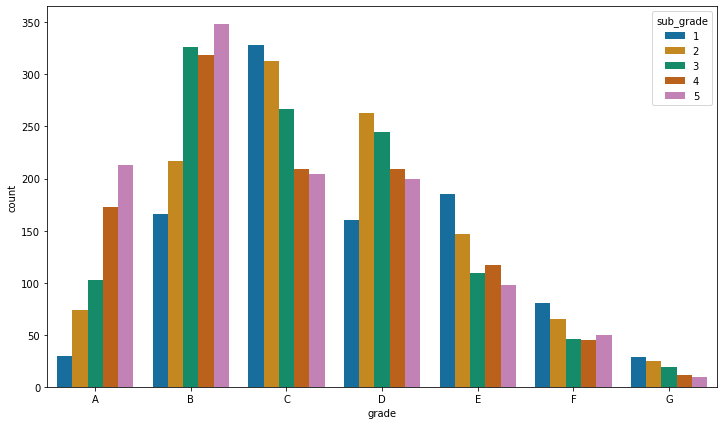

In [388]:
loandata.sub_grade = pd.to_numeric(loandata.sub_grade.apply(lambda x : x[-1]))
fig, ax = plt.subplots(figsize=(12,7))
sns.set_palette('colorblind')
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = loandata[loandata.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='grade', ylabel='count'>

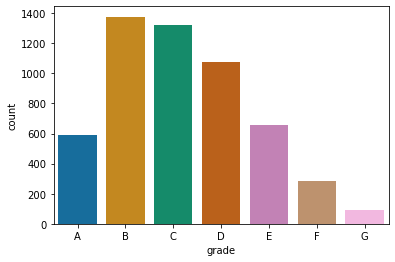

In [390]:
sns.countplot(x = 'grade', data = loandata[loandata.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

In [391]:
#checking unique values for home_ownership
loandata['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [392]:
loandata[loandata['home_ownership'] == 'NONE']

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,last_pymnt_amnt
39318,231321,10000,10000,1228.06,36 months,7.75,312.22,A,3,5,NONE,22200.0,Not Verified,Jan-08,Fully Paid,debt_consolidation,5.24,0,Apr-94,0,9,0,4767,8.7,22,11239.620890,1380.00,9999.99,313.59
39659,121568,4000,4000,1925.00,36 months,9.64,128.41,B,4,0,NONE,100000.0,Not Verified,Aug-07,Fully Paid,other,15.00,0,May-99,1,6,0,8155,14.9,8,4622.489229,2224.58,4000.00,129.76
39660,121535,2800,2800,1625.00,36 months,8.70,88.65,B,1,0,NONE,120000.0,Not Verified,Aug-07,Fully Paid,other,15.00,0,May-99,1,6,0,8155,14.9,8,3191.218575,1852.05,2800.00,89.80


In [393]:
#since there are only 3 values which are none replacing then with OTHER
loandata['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

In [394]:
loandata['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

<AxesSubplot:title={'center':'Loan Status'}, xlabel='home_ownership', ylabel='count'>

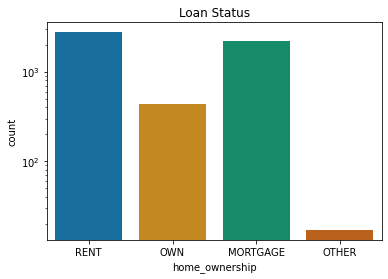

In [498]:
fig, ax = plt.subplots(figsize = (6,4))
ax.set(yscale = 'log')
plt.title('Loan Status')
sns.countplot(x='home_ownership', data=loandata[loandata['loan_status']=='Charged Off'])

<AxesSubplot:title={'center':'Loan Purpose'}, xlabel='count', ylabel='purpose'>

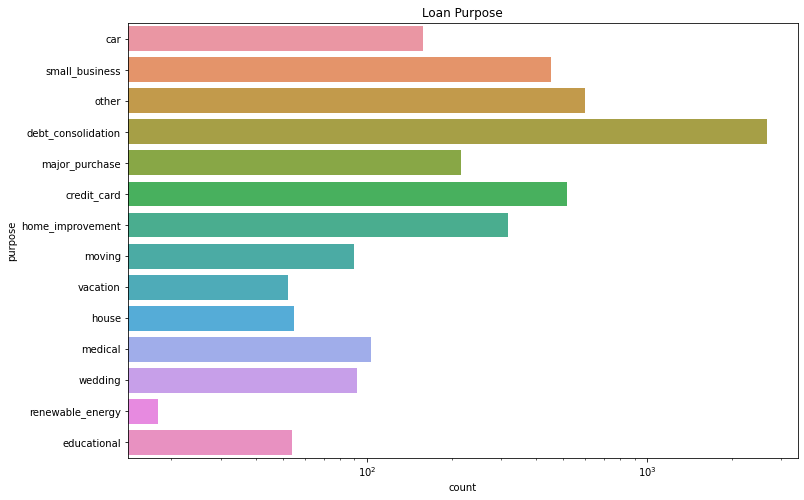

In [499]:
fig, ax = plt.subplots(figsize = (12,8))
ax.set(xscale = 'log')
plt.title('Loan Purpose')
sns.countplot(y ='purpose', data=loandata[loandata.loan_status == 'Charged Off'])

In [ ]:
#Creating Bins to Group the Data

In [420]:
print(loandata.loc[:,'int_rate'])
loandata['int_rate'].describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])


0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39711     8.70
39712     8.07
39713    10.28
39714     8.07
39716    13.75
Name: int_rate, Length: 36606, dtype: float64


count    36606.000000
mean        11.883216
std          3.666065
min          5.420000
5%           6.170000
10%          6.990000
25%          8.940000
50%         11.710000
75%         14.270000
90%         16.770000
95%         18.250000
99%         20.890000
max         24.400000
Name: int_rate, dtype: float64

In [ ]:
loandata['int_rate_groups'] = pd.cut(loandata['int_rate'], bins=5,precision =0,
                                     labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])

In [421]:
print(loandata.loc[:,'open_acc'])
loandata['open_acc'].describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])


0         3
1         3
2         2
3        10
5         9
         ..
39711    10
39712    13
39713     6
39714    11
39716     7
Name: open_acc, Length: 36606, dtype: int64


count    36606.000000
mean         9.173086
std          4.351894
min          2.000000
5%           3.000000
10%          4.000000
25%          6.000000
50%          8.000000
75%         12.000000
90%         15.000000
95%         17.000000
99%         22.000000
max         44.000000
Name: open_acc, dtype: float64

In [413]:
loandata['open_acc_groups'] = pd.cut(loandata['open_acc'],bins = 5,precision =0,
                                     labels=['2-10','10-19','19-27','27-36','36-44'])

In [422]:
print(loandata.loc[:,'revol_util'])
loandata['revol_util'].describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

0        83.7
1         9.4
2        98.5
3        21.0
5        28.3
         ... 
39711    23.0
39712    13.1
39713    26.9
39714    19.4
39716    51.5
Name: revol_util, Length: 36606, dtype: float64


count    36606.000000
mean        48.659741
std         28.282836
min          0.000000
5%           2.800000
10%          8.600000
25%         25.300000
50%         49.000000
75%         72.100000
90%         87.700000
95%         93.500000
99%         98.500000
max         99.900000
Name: revol_util, dtype: float64

In [416]:
loandata['revol_util_groups'] = pd.cut(loandata['revol_util'], bins=5,precision =0,
                                       labels=['0-20','20-40','40-60','60-80','80-100'])

In [423]:
print(loandata.loc[:,'total_acc'])
loandata['total_acc'].describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

0         9
1         4
2        10
3        37
5        12
         ..
39711    29
39712    40
39713     9
39714    20
39716     8
Name: total_acc, Length: 36606, dtype: int64


count    36606.000000
mean        21.655630
std         11.229937
min          2.000000
5%           7.000000
10%          9.000000
25%         13.000000
50%         20.000000
75%         28.000000
90%         37.000000
95%         43.000000
99%         55.000000
max         90.000000
Name: total_acc, dtype: float64

In [424]:
loandata['total_acc_groups'] = pd.cut(loandata['total_acc'], bins=5,precision =0,
                                      labels=['2-20','20-37','37-55','55-74','74-90'])

In [425]:
print(loandata.loc[:,'annual_inc'])
loandata['annual_inc'].describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

0         24000.0
1         30000.0
2         12252.0
3         49200.0
5         36000.0
           ...   
39711     75000.0
39712    110000.0
39713     18000.0
39714    100000.0
39716     22000.0
Name: annual_inc, Length: 36606, dtype: float64


count     36606.000000
mean      60890.563839
std       27741.337421
min        4000.000000
5%        24000.000000
10%       29172.000000
25%       40000.000000
50%       56000.000000
75%       78000.000000
90%      100000.000000
95%      117000.000000
99%      135000.000000
max      140004.000000
Name: annual_inc, dtype: float64

In [426]:
loandata['annual_inc_groups'] = pd.cut(loandata['annual_inc'], bins=5,precision =0,
                                       labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

In [428]:
loandata.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,last_pymnt_amnt,int_rate_groups,open_acc_groups,revol_util_groups,total_acc_groups,annual_inc_groups
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,0,Jan-85,1,3,0,13648,83.7,9,5863.155187,5833.84,5000.00,171.62,9%-13%,2-10,80-100,2-20,3k-31k
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,4,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,0,Apr-99,5,3,0,1687,9.4,4,1008.710000,1008.71,456.46,119.66,13%-17%,2-10,0-20,2-20,3k-31k
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,0,Nov-01,2,2,0,2956,98.5,10,3005.666844,3005.67,2400.00,649.91,13%-17%,2-10,80-100,2-20,3k-31k
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,0,Feb-96,1,10,0,5598,21.0,37,12231.890000,12231.89,10000.00,357.48,13%-17%,2-10,20-40,20-37,31k-58k
5,1075269,5000,5000,5000.0,36 months,7.90,156.46,A,4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,11.20,0,Nov-04,3,9,0,7963,28.3,12,5632.210000,5632.21,5000.00,161.03,5%-9%,2-10,20-40,2-20,31k-58k


<AxesSubplot:title={'center':'Employee Experience'}, xlabel='emp_length', ylabel='count'>

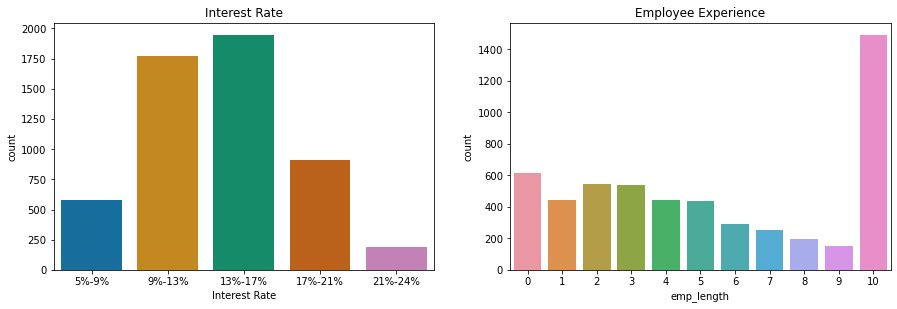

In [501]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
plt.title('Interest Rate')
sns.countplot(x='int_rate_groups', data=loandata[loandata.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')
plt.subplot(222)
plt.title('Employee Experience')
sns.countplot(x='emp_length', data=loandata[loandata.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='open_acc_groups', ylabel='count'>

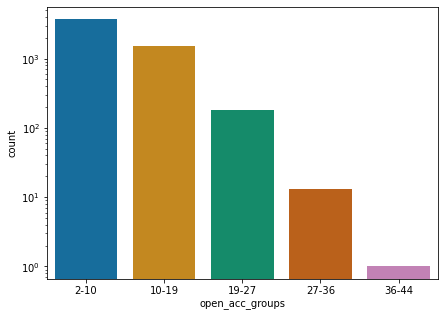

In [431]:
fig, ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='open_acc_groups', data=loandata[loandata.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='revol_util_groups', ylabel='count'>

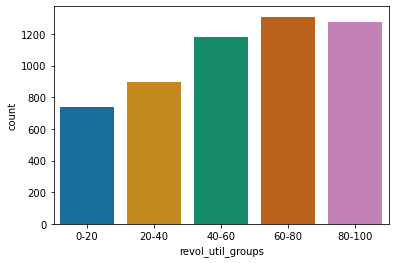

In [433]:
sns.countplot(x='revol_util_groups', data=loandata[loandata.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='total_acc_groups', ylabel='count'>

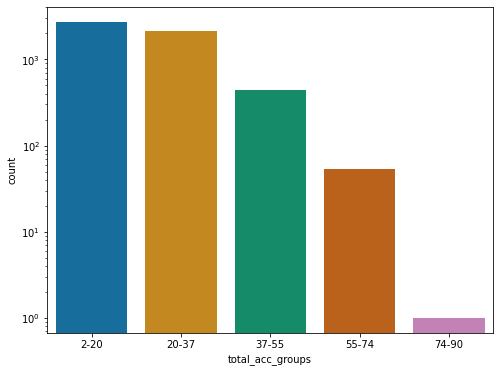

In [434]:
fig, ax = plt.subplots(figsize = (8,6))
ax.set_yscale('log')
sns.countplot(x='total_acc_groups', data=loandata[loandata.loan_status == 'Charged Off'])

<AxesSubplot:title={'center':'Annual Salary Income'}, xlabel='annual_inc_groups', ylabel='count'>

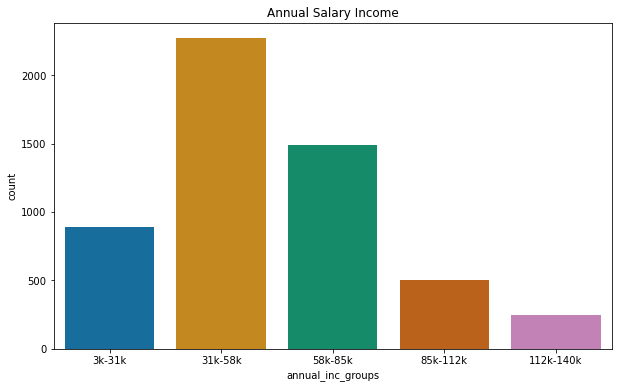

In [500]:
fig, ax = plt.subplots(figsize = (10,6))
plt.title('Annual Salary Income')
sns.countplot(x='annual_inc_groups', data=loandata[loandata.loan_status == 'Charged Off'])

<AxesSubplot:title={'center':'Loan Term'}, xlabel='count', ylabel='term'>

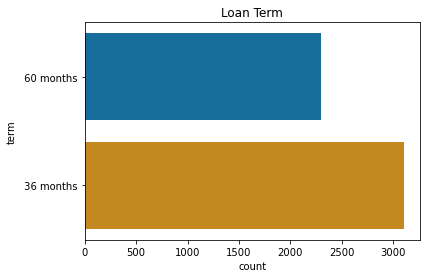

In [502]:
plt.title('Loan Term')
sns.countplot(y='term', data=loandata[loandata['loan_status']=='Charged Off'])

<AxesSubplot:title={'center':'Customer Verification Status'}, xlabel='verification_status', ylabel='count'>

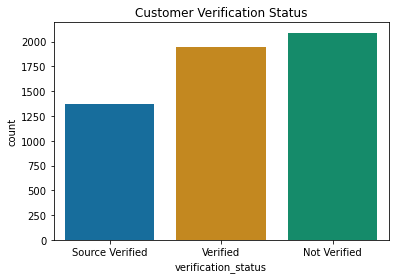

In [503]:
plt.title('Customer Verification Status')
sns.countplot(x='verification_status', data=loandata[loandata['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='inq_last_6mths', ylabel='count'>

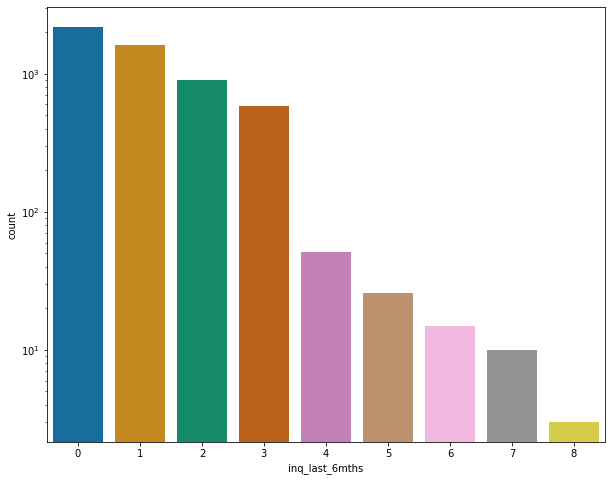

In [438]:
fig,ax = plt.subplots(figsize = (10,8))
ax.set_yscale('log')
sns.countplot(x='inq_last_6mths', data=loandata[loandata['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='pub_rec', ylabel='count'>

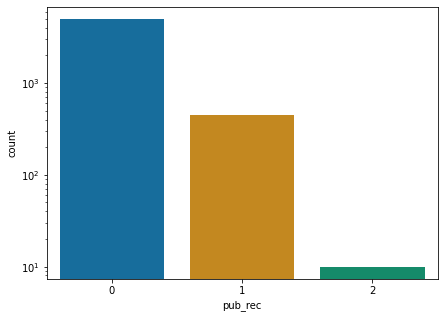

In [439]:
fig,ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='pub_rec', data=loandata[loandata['loan_status']=='Charged Off'])

In [446]:
print(loandata.loc[:,'installment'])
loandata['installment'].describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

0        162.87
1         59.83
2         84.33
3        339.31
5        156.46
          ...  
39711    158.30
39712     78.42
39713    275.38
39714    156.84
39716    255.43
Name: installment, Length: 36606, dtype: float64


count    36606.000000
mean       312.088564
std        199.238384
min         15.690000
5%          69.250000
10%         97.960000
25%        163.110000
50%        270.845000
75%        408.902500
90%        589.210000
95%        706.590000
99%        898.305000
max       1305.190000
Name: installment, dtype: float64

In [448]:
loandata['installment_groups'] = pd.cut(loandata['installment'], bins=10,precision =0,
                                       labels =['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])

<AxesSubplot:title={'center':'Installments'}, xlabel='installment_groups', ylabel='count'>

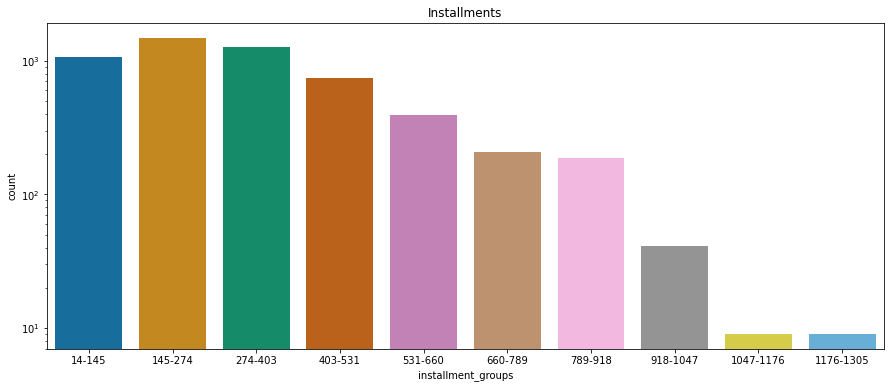

In [506]:
fig,ax = plt.subplots(figsize = (15,6))
plt.title('Installments')
ax.set_yscale('log')
sns.countplot(x='installment_groups', data=loandata[loandata['loan_status']=='Charged Off'])

In [451]:
print(loandata.loc[:,'funded_amnt_inv'])
loandata['funded_amnt_inv'].describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

0         4975.0
1         2500.0
2         2400.0
3        10000.0
5         5000.0
          ...   
39711      700.0
39712     1075.0
39713      875.0
39714     1325.0
39716      800.0
Name: funded_amnt_inv, Length: 36606, dtype: float64


count    36606.000000
mean      9902.311039
std       6730.696329
min          0.000000
5%        1800.000000
10%       2800.000000
25%       4988.276705
50%       8396.342174
75%      13649.999283
90%      19750.000000
95%      23949.287805
99%      31966.803281
max      35000.000000
Name: funded_amnt_inv, dtype: float64

In [453]:
loandata['funded_amnt_inv_group'] = pd.cut(loandata['funded_amnt_inv'], bins=7,
                                           labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])

<AxesSubplot:title={'center':'Funded Amount by Investors'}, xlabel='funded_amnt_inv_group', ylabel='count'>

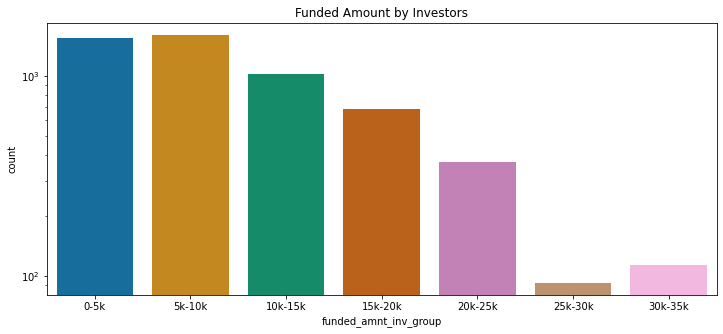

In [508]:
fig,ax = plt.subplots(figsize = (12,5))
plt.title("Funded Amount by Investors")
ax.set_yscale('log')
sns.countplot(x='funded_amnt_inv_group', data=loandata[loandata['loan_status']=='Charged Off'])

In [455]:
print(loandata.loc[:,'loan_amnt'])
loandata['loan_amnt'].describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

0         5000
1         2500
2         2400
3        10000
5         5000
         ...  
39711     5000
39712     2500
39713     8500
39714     5000
39716     7500
Name: loan_amnt, Length: 36606, dtype: int64


count    36606.000000
mean     10690.058324
std       7048.412687
min        500.000000
5%        2300.000000
10%       3000.000000
25%       5000.000000
50%       9250.000000
75%      15000.000000
90%      20000.000000
95%      25000.000000
99%      35000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [456]:
loandata['loan_amnt_groups'] = pd.cut(loandata['loan_amnt'], bins=7,precision =0,
                                       labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])

<AxesSubplot:title={'center':'Loan Amount'}, xlabel='loan_amnt_groups', ylabel='count'>

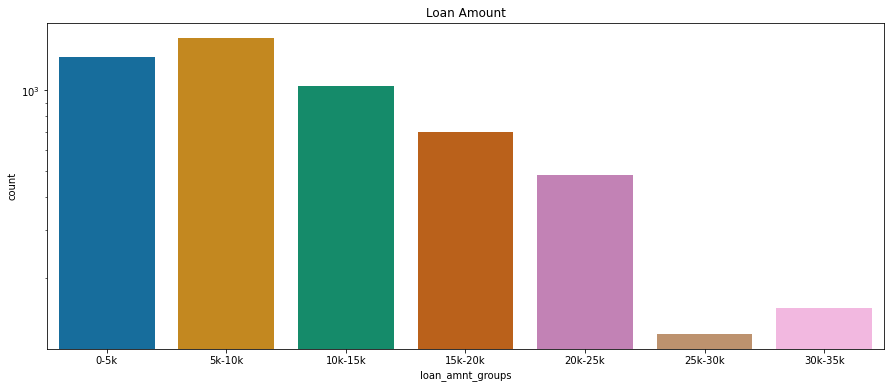

In [509]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
plt.title('Loan Amount')
sns.countplot(x='loan_amnt_groups', data=loandata[loandata['loan_status']=='Charged Off'])

In [ ]:
print(loandata.loc[:,'dti'])
loandata['dti'].describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

In [459]:
loandata['dti_groups'] = pd.cut(loandata['dti'], bins=5,precision =0,
                                 labels=['0-6','6-12','12-18','18-24','24-30'])

<AxesSubplot:title={'center':'DTI(Debt to Income Ration)'}, xlabel='dti_groups', ylabel='count'>

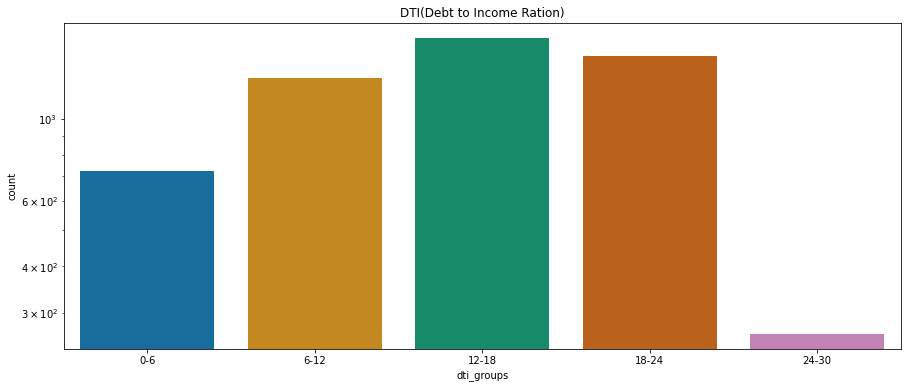

In [504]:
fig,ax = plt.subplots(figsize = (15,6))
plt.title('DTI(Debt to Income Ration)')
ax.set_yscale('log')
sns.countplot(x='dti_groups', data=loandata[loandata['loan_status']=='Charged Off'])

In [ ]:
# Applicants having house_ownership as 'RENT'
# Applicants who use the loan to clear other debts
# Applicants who receive interest at the rate of 13-17%
# Applicants who have an income of range 31201 - 58402
# Applicants who have 20-37 open_acc
# Applicants with employement length of 10
# When funded amount by investor is between 5000-10000
# Loan amount is between 5429 - 10357
# Dti is between 12-18
# When monthly installments are between 145-274
# Term of 36 months
# When the loan status is Not verified
# When the no of enquiries in last 6 months is 0
# When the number of derogatory public records is 0
# When the purpose is 'debt_consolidation'
# Grade is 'B'
# And a total grade of 'B5' level.

In [ ]:
#Analysing Annual income as it would play a major role in loan repayment

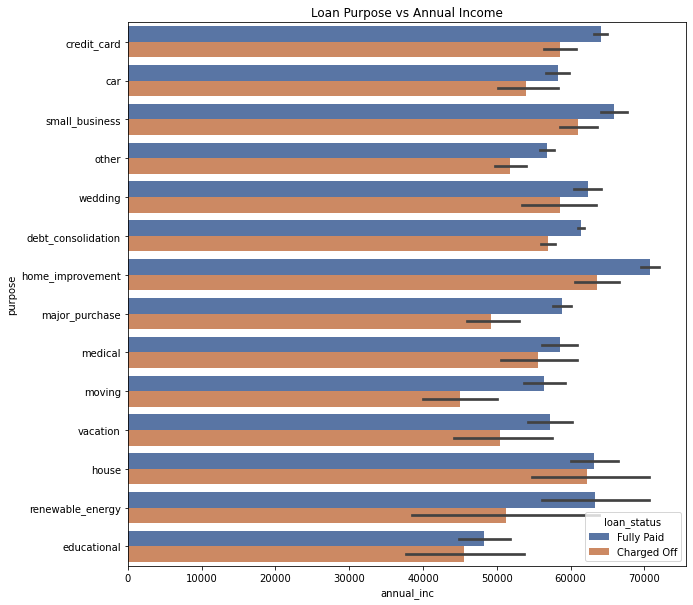

In [516]:
plt.figure(figsize=(10,10))
plt.title('Loan Purpose vs Annual Income')
sns.barplot(data =loandata,x='annual_inc', y='purpose', hue ='loan_status',palette="deep")
plt.show()

In [ ]:
#Applicants with higher salary mostly applied loans for "home_improvment", "house", "renewable_energy" and "small_businesses"

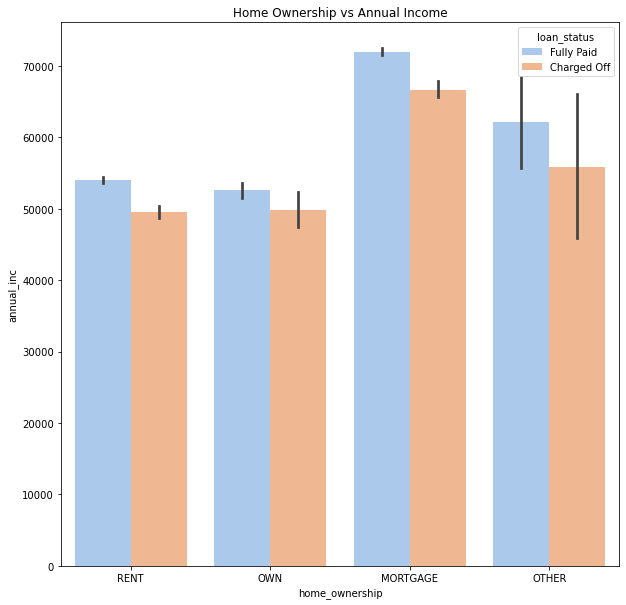

In [517]:
plt.figure(figsize=(10,10))
plt.title('Home Ownership vs Annual Income')
sns.barplot(data =loandata,x='home_ownership', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

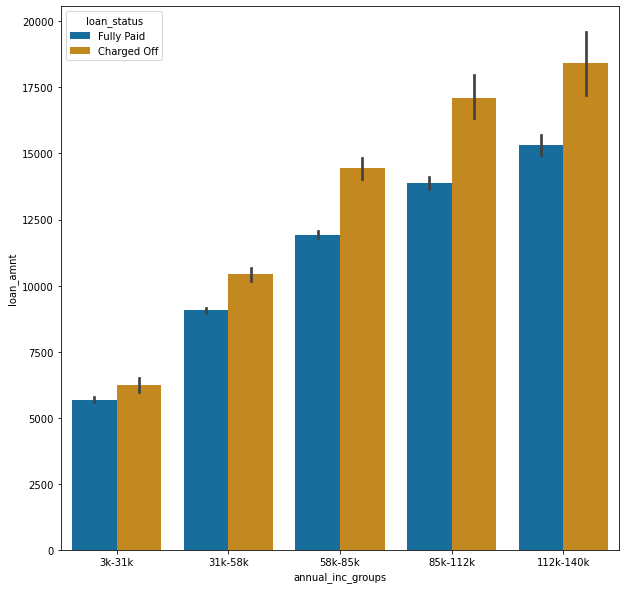

In [465]:
plt.figure(figsize=(10,10))
sns.barplot(x = "annual_inc_groups", y = "loan_amnt", hue = 'loan_status', data = loandata)
plt.show()

In [ ]:
#Across all the income groups, the loan_amount is higher for people who defaulted.

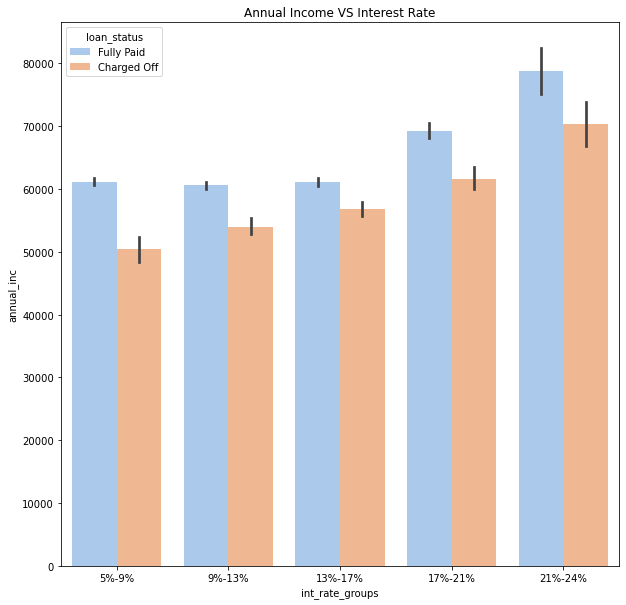

In [518]:
plt.figure(figsize=(10,10))
plt.title("Annual Income VS Interest Rate")
sns.barplot(data =loandata,x='int_rate_groups', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

In [ ]:
#Analysing Loan amount with other columns

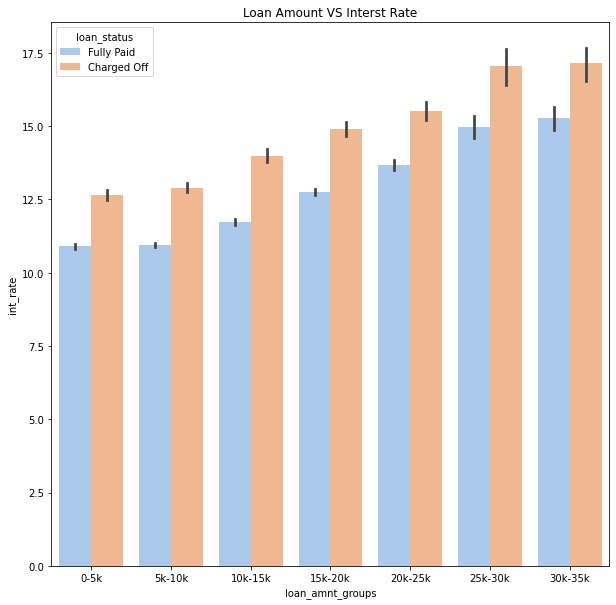

In [519]:
plt.figure(figsize=(10,10))
plt.title('Loan Amount VS Interst Rate')
sns.barplot(data =loandata,x='loan_amnt_groups', y='int_rate', hue ='loan_status',palette="pastel")
plt.show()

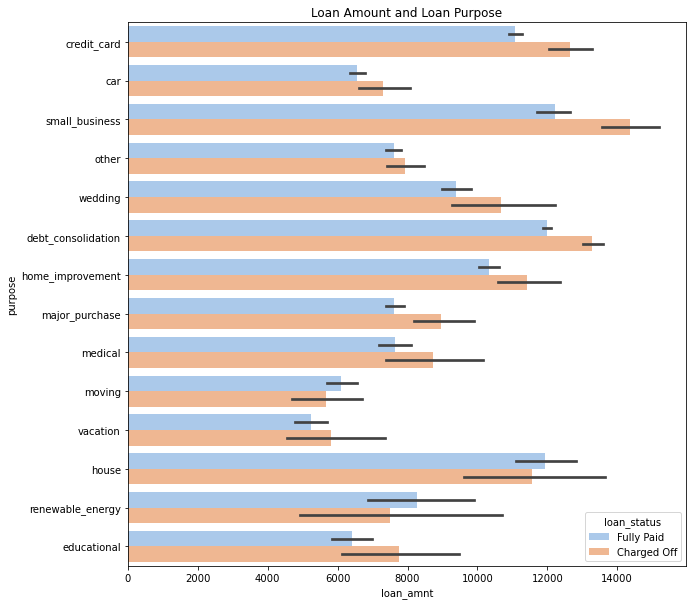

In [520]:
plt.figure(figsize=(10,10))
plt.title('Loan Amount and Loan Purpose')
sns.barplot(data =loandata,x='loan_amnt', y='purpose', hue ='loan_status',palette="pastel")
plt.show()

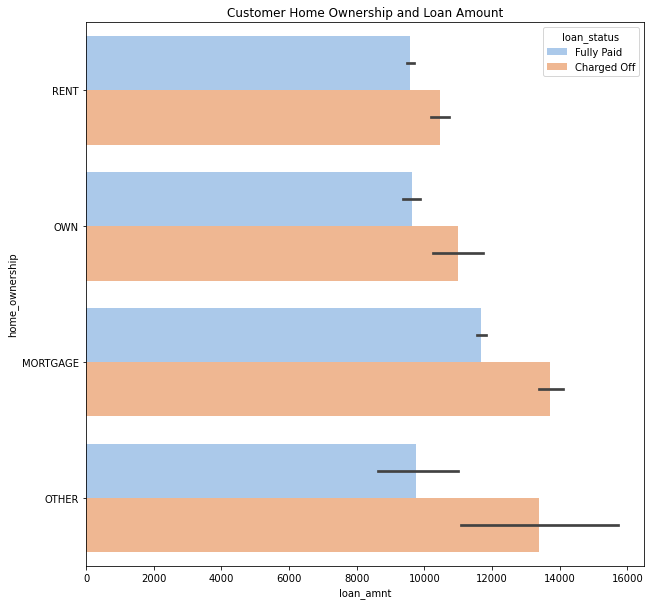

In [521]:
plt.figure(figsize=(10,10))
plt.title('Customer Home Ownership and Loan Amount')
sns.barplot(data =loandata,x='loan_amnt', y='home_ownership', hue ='loan_status',palette="pastel")
plt.show()

<AxesSubplot:xlabel='issue_d_year', ylabel='loan_amnt'>

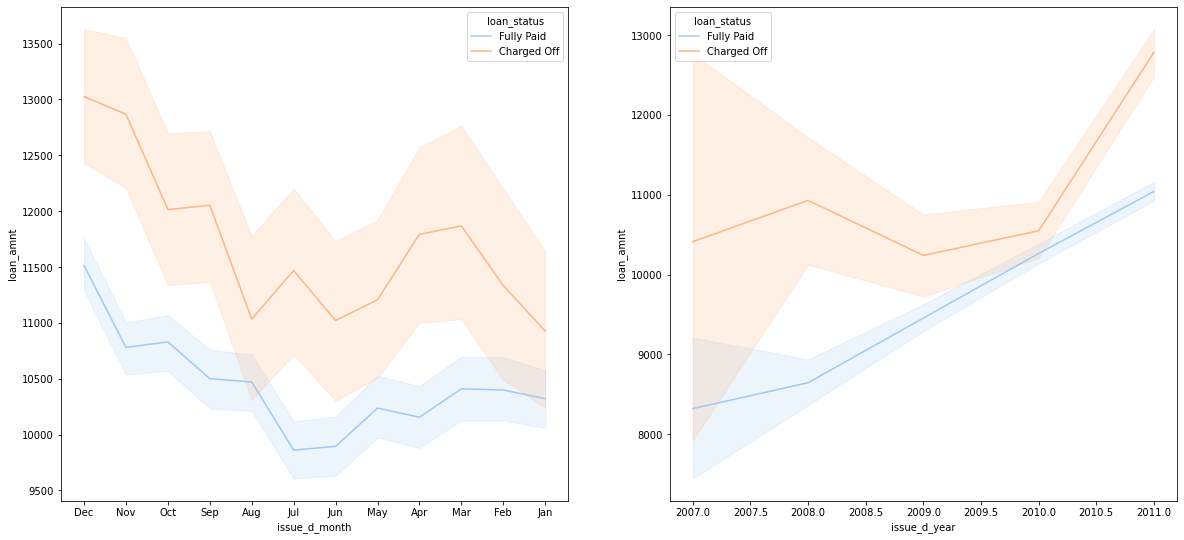

In [474]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.lineplot(data =loandata,y='loan_amnt', x='issue_d_month', hue ='loan_status',palette="pastel")
plt.subplot(222)
sns.lineplot(data =loandata,y='loan_amnt', x='issue_d_year', hue ='loan_status',palette="pastel")

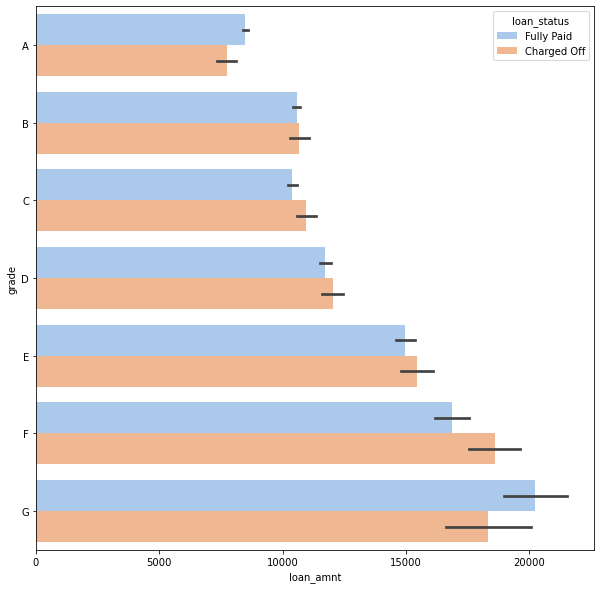

In [476]:
plt.figure(figsize=(10,10))
sns.barplot(data =loandata,x='loan_amnt', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

<AxesSubplot:title={'center':'Verification Status Vs Loan Amount'}, xlabel='verification_status', ylabel='loan_amnt'>

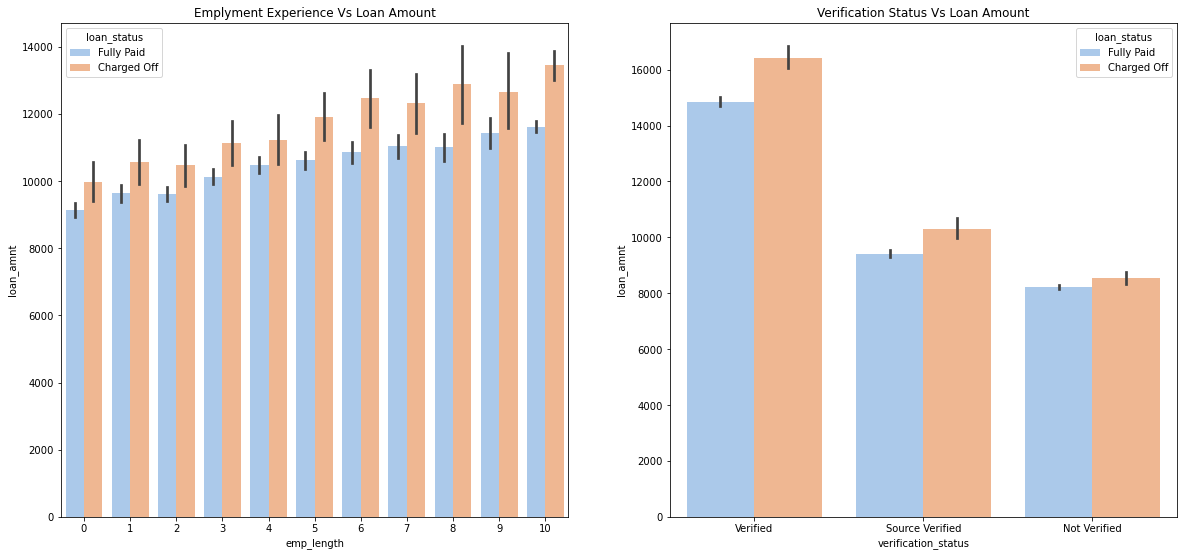

In [523]:
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.title('Emplyment Experience Vs Loan Amount')
sns.barplot(data =loandata,y='loan_amnt', x='emp_length', hue ='loan_status',palette="pastel")
plt.subplot(222)
plt.title('Verification Status Vs Loan Amount')
sns.barplot(data =loandata,y='loan_amnt', x='verification_status', hue ='loan_status',palette="pastel")

In [ ]:
# Looking at the verification status data, verified loan applications tend to have higher loan amount. 
# Which might indicate that the firms are first verifying the loans with higher values.

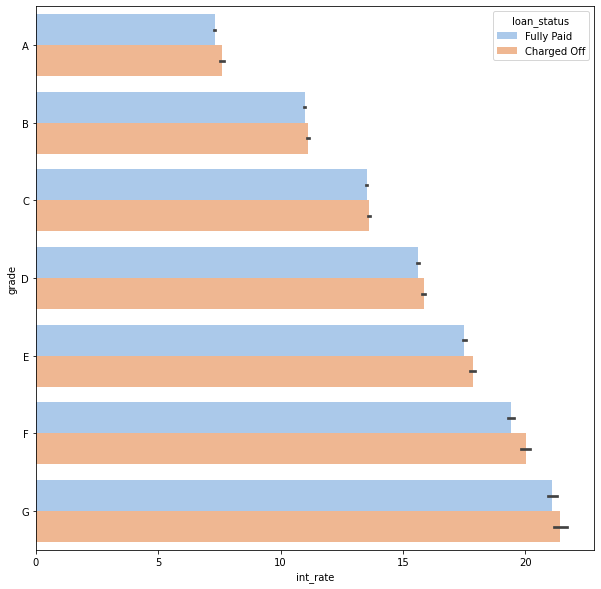

In [480]:
plt.figure(figsize=(10,10))
sns.barplot(data =loandata,x='int_rate', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

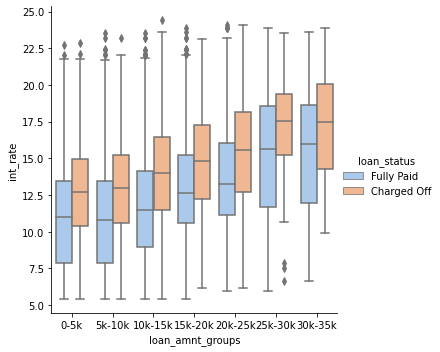

In [482]:
sns.catplot(data =loandata,y ='int_rate', x ='loan_amnt_groups', hue ='loan_status',palette="pastel",kind = 'box')

In [ ]:
#The interest rate for charged off loans is pretty high than that of fully paid loans in all the loan_amount groups. 
#This can be a pretty strong driving factor for loan defaulting.

Text(0.5, 0.98, 'Loan Term')

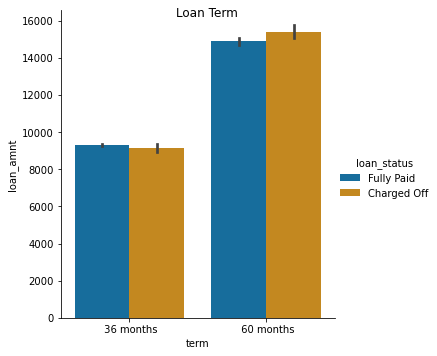

In [515]:
plot = sns.catplot(x = 'term', y = 'loan_amnt', data = loandata,hue = 'loan_status', kind = 'bar')
plot.fig.suptitle('Loan Term')

In [489]:
# Observations

# - Applicants taking loan for 'home improvement' and have income of 60k -70k
# - Applicants whose home ownership is 'MORTGAGE and have income of 60-70k
# - Applicants who receive interest at the rate of 21-24% and have an income of 70k-80k
# - Applicants who have taken a loan in the range 30k - 35k and are charged interest rate of 15-17.5 %
# - Applicants who have taken a loan for small business and the loan amount is greater than 14k
# - Applicants whose home ownership is 'MORTGAGE and have loan of 14-16k
# - When grade is F and loan amount is between 15k-20k
# - When employment length is 10yrs and loan amount is 12k-14k 
# - When the loan is verified and loan amount is above 16k
# - For grade G and interest rate above 20%